Accuracy Score: 0.99

Precision Score: 1.00

Recall Score: 0.94

F1 Score: 0.97



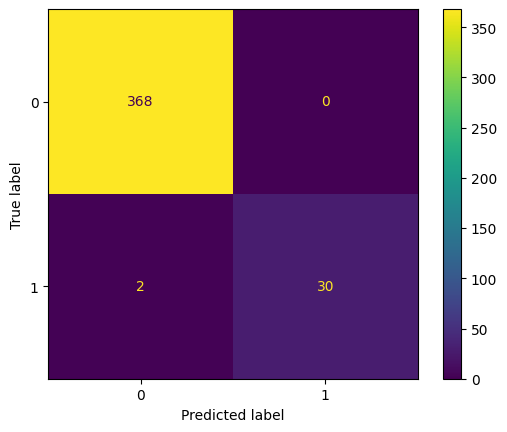

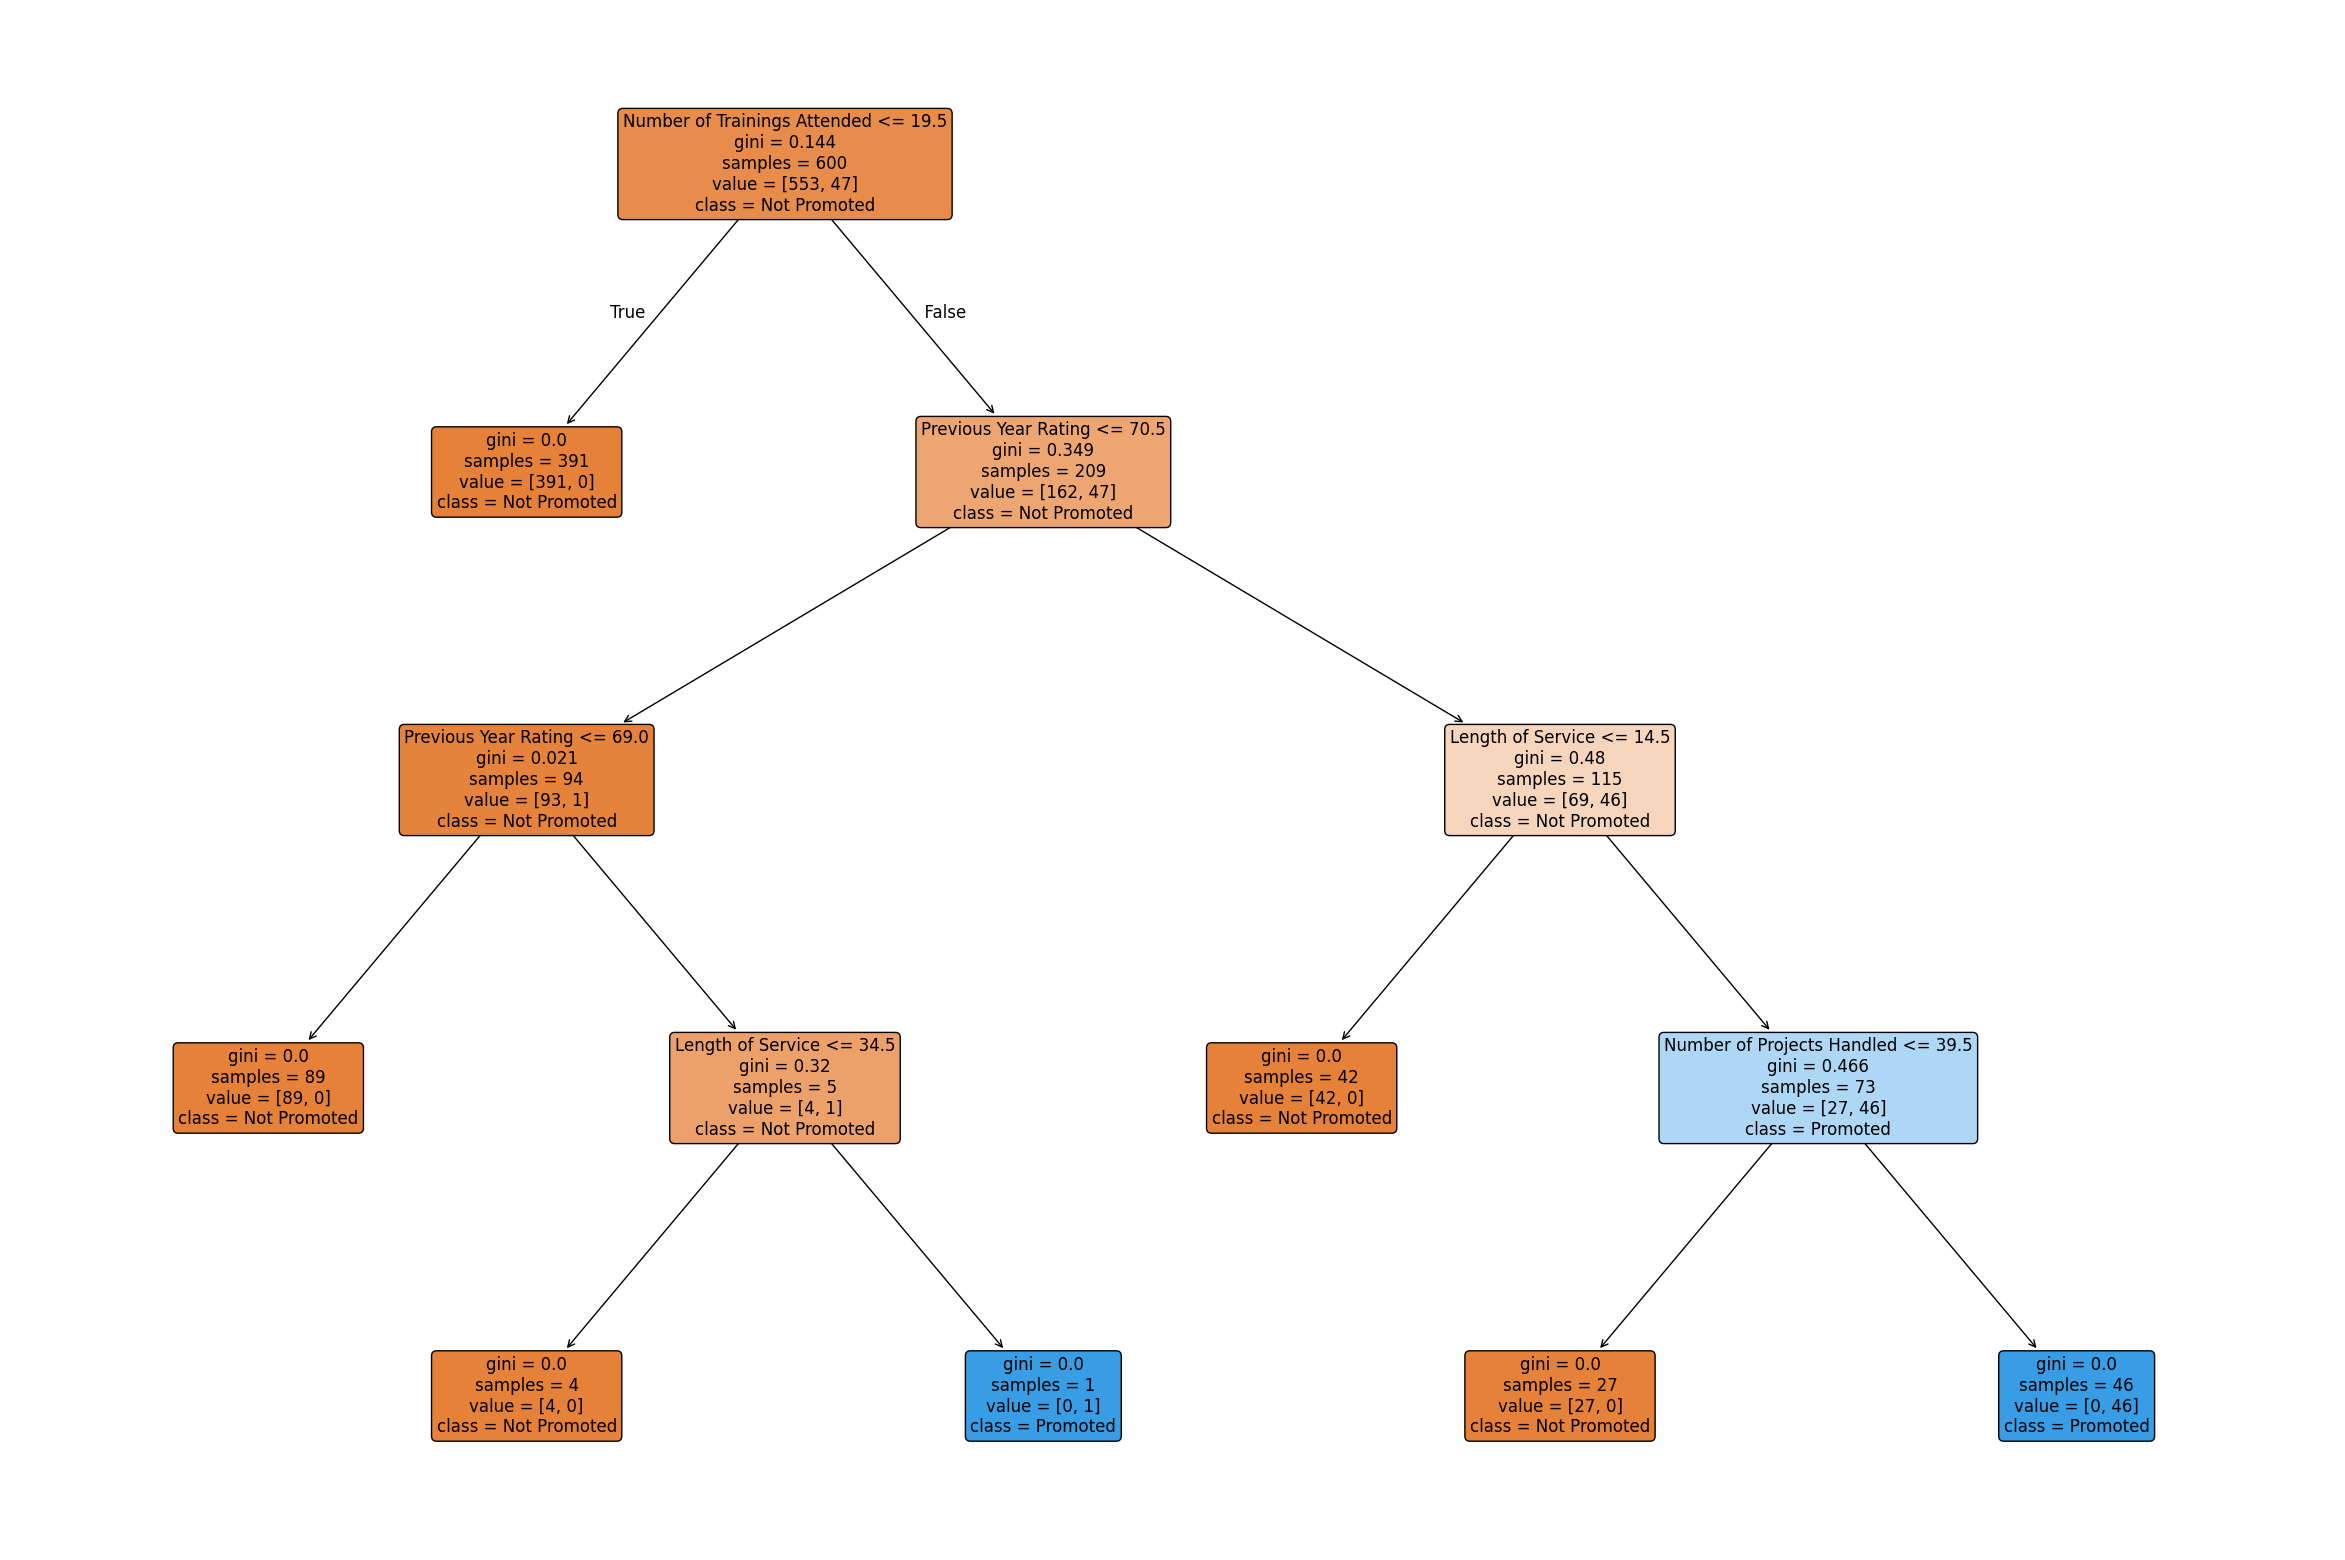

['saved model.joblib']

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score\
    , recall_score, ConfusionMatrixDisplay, f1_score

#read data
file_name = input("Hello! Please provide the name of the data file you want the model to use for training:")
df = pd.read_csv(f"{file_name}.csv")

pd.DataFrame(df)

#set the target colum and drop unnecessary data that could cause in biases
target = "Promoted"
x = df.drop(columns=[target, "Department", "Gender","Education Level"],axis = 1)
y = df[target]

#convert the strings to binary
x = pd.get_dummies(x)

#set up the testing data and trained data
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.60,stratify=y,random_state=42)

#build the model 
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#predict if the employee deserve to get promoted
pred = dt.predict(x_test)

#evaluate the model performace
accur_score = accuracy_score(y_test,pred)
prec_score = precision_score(y_test,pred)
rec_score = recall_score(y_test,pred)
f1_sc = f1_score(y_test,pred)
print(f"Accuracy Score: {accur_score:.2f}\n")
print(f"Precision Score: {prec_score:.2f}\n")
print(f"Recall Score: {rec_score:.2f}\n")
print(f"F1 Score: {f1_sc:.2f}\n")

#confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred = pred)
disp = ConfusionMatrixDisplay(cm, display_labels = dt.classes_)
disp.plot()
plt.show()    

# Plot the decision tree
plt.figure(figsize=(30,20))
plot_tree(dt, filled=True,feature_names=x.columns, class_names=['Not Promoted', 'Promoted'], rounded=True, fontsize=12)
plt.show()

dump(dt,'saved model.joblib') #save the training model and the knoweldge gained for future usage